In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import astropy.coordinates
from astropy import units as u
from scipy import stats

%matplotlib inline

In [3]:
import pandas as pd

In [4]:
isodata=pd.read_csv('output433214691075.dat', sep=' ',header=0,skipinitialspace=True,comment='#')

In [5]:
isodata

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,G_RP_i45,G_RP_i50,G_RP_i55,G_RP_i60,G_RP_i65,G_RP_i70,G_RP_i75,G_RP_i80,G_RP_i85,G_RP_i90
0,0.0207,0.15867,6.60000,0.090848,1.089768,0.091,-1.657,3.4087,3.640,0,...,9.557,9.557,9.557,9.557,9.557,9.557,9.557,9.557,9.557,9.557
1,0.0207,0.15867,6.60000,0.091529,1.096176,0.092,-1.656,3.4088,3.643,0,...,9.553,9.553,9.553,9.553,9.553,9.553,9.553,9.553,9.553,9.553
2,0.0207,0.15867,6.60000,0.092225,1.102672,0.092,-1.654,3.4090,3.645,0,...,9.549,9.549,9.549,9.549,9.549,9.549,9.549,9.549,9.549,9.549
3,0.0207,0.15867,6.60000,0.092890,1.108810,0.093,-1.652,3.4091,3.647,0,...,9.544,9.544,9.544,9.544,9.544,9.544,9.544,9.544,9.544,9.544
4,0.0207,0.15867,6.60000,0.093528,1.114647,0.093,-1.651,3.4092,3.648,0,...,9.540,9.540,9.540,9.540,9.540,9.540,9.540,9.540,9.540,9.540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104459,0.0207,0.15867,10.12005,0.990421,2.470888,0.876,3.252,3.4939,0.056,7,...,-2.364,-2.364,-2.364,-2.364,-2.364,-2.364,-2.364,-2.364,-2.364,-2.364
104460,0.0207,0.15867,10.12005,0.990422,2.470888,0.876,3.268,3.4914,0.030,7,...,-2.336,-2.336,-2.336,-2.336,-2.336,-2.336,-2.336,-2.336,-2.336,-2.336
104461,0.0207,0.15867,10.12005,0.990422,2.470888,0.875,3.288,3.4880,-0.004,7,...,-2.312,-2.312,-2.312,-2.312,-2.312,-2.312,-2.312,-2.312,-2.312,-2.312
104462,0.0207,0.15867,10.12005,0.990423,2.470888,0.874,3.310,3.4843,-0.041,7,...,-2.294,-2.294,-2.294,-2.294,-2.294,-2.294,-2.294,-2.294,-2.294,-2.294


In [17]:
sel_old = isodata['logAge']==isodata['logAge'].values.max()
sel_new = isodata['logAge']==9.12002
kgiant_sel = (isodata['logTe']>np.log10(4000))&(isodata['logTe']<np.log10(5200))&(isodata['G_f0']<2)

In [18]:
isodata[sel_new*kgiant_sel]

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,G_RP_i45,G_RP_i50,G_RP_i55,G_RP_i60,G_RP_i65,G_RP_i70,G_RP_i75,G_RP_i80,G_RP_i85,G_RP_i90
51377,0.0207,0.15867,9.12002,1.924117,2.565170,1.921,1.144,3.7142,3.387,3,...,1.256,1.256,1.256,1.256,1.256,1.256,1.256,1.256,1.256,1.256
51378,0.0207,0.15867,9.12002,1.924671,2.565196,1.921,1.172,3.7079,3.333,3,...,1.186,1.186,1.186,1.186,1.186,1.186,1.186,1.186,1.186,1.186
51379,0.0207,0.15867,9.12002,1.925132,2.565217,1.922,1.207,3.7036,3.281,3,...,1.098,1.098,1.098,1.098,1.098,1.098,1.098,1.098,1.098,1.098
51380,0.0207,0.15867,9.12002,1.925501,2.565234,1.922,1.240,3.7007,3.236,3,...,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017
51381,0.0207,0.15867,9.12002,1.925869,2.565251,1.922,1.276,3.6981,3.191,3,...,0.930,0.930,0.930,0.930,0.930,0.930,0.930,0.930,0.930,0.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53310,0.0207,0.15867,9.12002,2.114747,2.573117,2.102,2.693,3.6080,1.452,7,...,-2.448,-2.448,-2.448,-2.448,-2.448,-2.448,-2.448,-2.448,-2.448,-2.448
53311,0.0207,0.15867,9.12002,2.114816,2.573120,2.102,2.706,3.6069,1.434,7,...,-2.476,-2.476,-2.476,-2.476,-2.476,-2.476,-2.476,-2.476,-2.476,-2.476
53312,0.0207,0.15867,9.12002,2.114892,2.573123,2.102,2.720,3.6056,1.416,7,...,-2.506,-2.506,-2.506,-2.506,-2.506,-2.506,-2.506,-2.506,-2.506,-2.506
53313,0.0207,0.15867,9.12002,2.114933,2.573124,2.102,2.728,3.6049,1.404,7,...,-2.523,-2.523,-2.523,-2.523,-2.523,-2.523,-2.523,-2.523,-2.523,-2.523


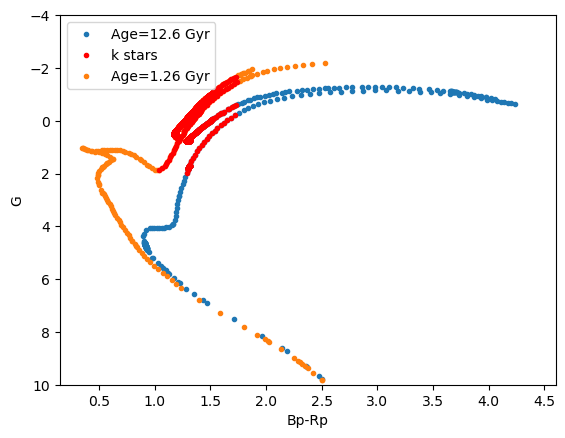

In [19]:
plt.plot(isodata[sel_old]['G_BP_f0']-isodata[sel_old]['G_RP_f0'], isodata[sel_old]['G_f0'],'.', label='Age=12.6 Gyr')
plt.plot(isodata[sel_old*kgiant_sel]['G_BP_f0']-isodata[sel_old*kgiant_sel]['G_RP_f0'], isodata[sel_old*kgiant_sel]['G_f0'],'or', ms=3, label='k stars')
plt.plot(isodata[sel_new]['G_BP_f0']-isodata[sel_new]['G_RP_f0'], isodata[sel_new]['G_f0'],'.',  label='Age=1.26 Gyr')
plt.plot(isodata[sel_new*kgiant_sel]['G_BP_f0']-isodata[sel_new*kgiant_sel]['G_RP_f0'], isodata[sel_new*kgiant_sel]['G_f0'],'or',  ms=3)

plt.ylim(10,-4)
plt.xlabel('Bp-Rp')
plt.ylabel('G')
plt.legend()
plt.savefig('gaia_colors.png')

In [27]:
isodata=pd.read_csv('output928957327342.dat', sep=' ',header=0,skipinitialspace=True,comment='#')

In [32]:
isodata[sel_new*kgiant_sel]

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,F062mag,F087mag,F106mag,F129mag,F158mag,F184mag,F146mag,F213mag
57007,0.0207,0.15867,9.12002,0.650128,2.352108,0.650,-1.045,3.6028,4.659,1,...,0.02058,7.382,7.683,6.514,6.104,5.660,5.153,4.987,5.580,4.935
57008,0.0207,0.15867,9.12002,0.665951,2.360782,0.666,-0.995,3.6118,4.656,1,...,0.02056,7.258,7.497,6.400,6.008,5.563,5.050,4.879,5.478,4.836
57009,0.0207,0.15867,9.12002,0.700064,2.377957,0.700,-0.891,3.6305,4.649,1,...,0.02054,6.999,7.122,6.158,5.799,5.359,4.849,4.678,5.274,4.649
57010,0.0207,0.15867,9.12002,0.750000,2.399889,0.750,-0.740,3.6622,4.654,1,...,0.02057,6.619,6.586,5.781,5.477,5.073,4.620,4.470,5.010,4.453
57011,0.0207,0.15867,9.12002,0.787623,2.414318,0.787,-0.641,3.6766,4.634,1,...,0.02054,6.372,6.282,5.535,5.255,4.873,4.455,4.318,4.823,4.302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57186,0.0207,0.15867,9.12002,2.147556,2.574322,2.146,2.716,3.6090,1.442,7,...,0.02098,-2.019,-1.757,-2.787,-3.210,-3.716,-4.233,-4.465,-3.800,-4.520
57187,0.0207,0.15867,9.12002,2.147655,2.574326,2.146,2.756,3.6055,1.387,7,...,0.02098,-2.121,-1.829,-2.884,-3.316,-3.828,-4.351,-4.588,-3.914,-4.645
57188,0.0207,0.15867,9.12002,2.147728,2.574329,2.146,2.794,3.6022,1.336,7,...,0.02098,-2.216,-1.895,-2.975,-3.414,-3.932,-4.461,-4.703,-4.021,-4.762
57205,0.0207,0.15867,9.12002,2.148504,2.574357,2.136,2.687,3.6092,1.470,8,...,0.02099,-1.947,-1.687,-2.715,-3.138,-3.643,-4.161,-4.392,-3.727,-4.447


In [40]:
sel_old = isodata['logAge']==isodata['logAge'].values.max()
sel_new = isodata['logAge']==9.12002
kgiant_sel = (isodata['logTe']>np.log10(4000))&(isodata['logTe']<np.log10(5200))&(isodata['F158mag']<2)

In [41]:
(sel_new*kgiant_sel).sum()

np.int64(98)

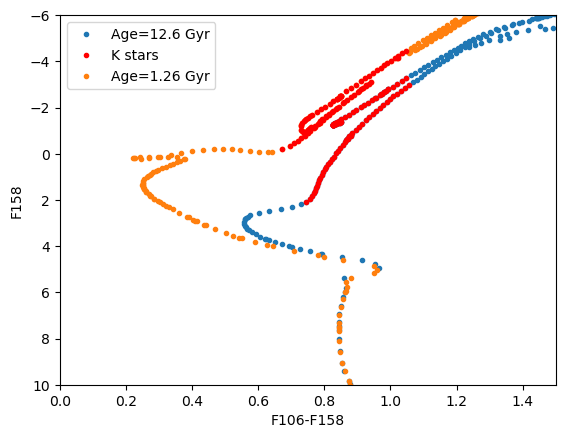

In [47]:
plt.plot(isodata[sel_old]['F106mag']-isodata[sel_old]['F158mag'], isodata[sel_old]['F158mag'],'.', label='Age=12.6 Gyr')
plt.plot(isodata[sel_old*kgiant_sel]['F106mag']-isodata[sel_old*kgiant_sel]['F158mag'], isodata[sel_old*kgiant_sel]['F158mag'],'or', ms=3,label='K stars')
plt.plot(isodata[sel_new]['F106mag']-isodata[sel_new]['F158mag'], isodata[sel_new]['F158mag'],'.',  label='Age=1.26 Gyr')
plt.plot(isodata[sel_new*kgiant_sel]['F106mag']-isodata[sel_new*kgiant_sel]['F158mag'], isodata[sel_new*kgiant_sel]['F158mag'],'or', ms=3)
plt.ylim(10,-6)
plt.xlim(0,1.5)
plt.xlabel('F106-F158')
plt.ylabel('F158')
plt.legend()
plt.savefig('roman_colors.png')

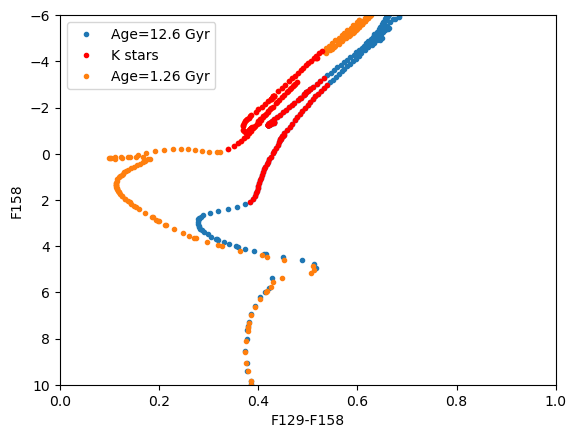

In [49]:
plt.plot(isodata[sel_old]['F129mag']-isodata[sel_old]['F158mag'], isodata[sel_old]['F158mag'],'.', label='Age=12.6 Gyr')
plt.plot(isodata[sel_old*kgiant_sel]['F129mag']-isodata[sel_old*kgiant_sel]['F158mag'], isodata[sel_old*kgiant_sel]['F158mag'],'or', ms=3,label='K stars')
plt.plot(isodata[sel_new]['F129mag']-isodata[sel_new]['F158mag'], isodata[sel_new]['F158mag'],'.',  label='Age=1.26 Gyr')
plt.plot(isodata[sel_new*kgiant_sel]['F129mag']-isodata[sel_new*kgiant_sel]['F158mag'], isodata[sel_new*kgiant_sel]['F158mag'],'or', ms=3)
plt.ylim(10,-6)
plt.xlim(0,1.)
plt.xlabel('F129-F158')
plt.ylabel('F158')
plt.legend()
plt.savefig('roman_colors_red.png')